In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.10.0


# CIFAR-10 Image Classification

## 📌 Project Overview
Image classification of 32x32 color images using Convolutional Neural Networks. The goal is to correctly classify images into one of 10 categories.

## 🗂 Dataset
- CIFAR-10 dataset
- 50,000 training and 10,000 testing images
- 10 classes: airplane, car, bird, cat, deer, dog, frog, horse, ship, truck


In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()


from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])


interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

In [3]:
# Check the shape and data type of train_labels
print("Shape of train_labels:", train_labels.shape)
print("Data type of train_labels:", train_labels.dtype)

# Print a few examples of train_labels
print("Examples of train_labels:", train_labels[:10])

Shape of train_labels: (50000, 1)
Data type of train_labels: uint8
Examples of train_labels: [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [4]:
train_data.shape, test_data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [39]:
# Normalize the training data and test data by dividing by 255 to scale the pixel values between 0 and 1
train_data = train_data/ 255.0
test_data = test_data / 255.0

There is a total of 50,000 images for training and 10,000 images for testing. Besides, each of these images is of dimensions 32×32 and colour.


In [6]:
num_class =10
# Convert the training labels and test labels to one-hot encoded format using to_categorical function
train_labels = keras.utils.to_categorical(train_labels, num_class)
test_labels = keras.utils.to_categorical(test_labels, num_class)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization


num_classes = 10
model1 = Sequential()

# Convolutional layers with batch normalization
model1.add(Conv2D(32, (3, 3), padding='same', input_shape=train_data.shape[1:]))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flatten layer
model1.add(Flatten())

# Fully connected layers with batch normalization
model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))


In [8]:
#Compile the model using categorical crossentropy as the loss function, Adam optimizer, and accuracy as the evaluation metric
model1.compile(loss='categorical_crossentropy',
              optimizer='Adam',metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        1

In [10]:
# Train the model using the training data for 10 epochs, and validate it using the test data
model1.fit(train_data,train_labels, 
          epochs=10,
          validation_data=(test_data,test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 21ms/step - loss: 1.4367 - accuracy: 0.4963 - val_loss: 1.1151 - val_accuracy: 0.6016
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0838 - accuracy: 0.6135 - val_loss: 1.1694 - val_accuracy: 0.5918
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9628 - accuracy: 0.6622 - val_loss: 0.9818 - val_accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8881 - accuracy: 0.6871 - val_loss: 0.8405 - val_accuracy: 0.7066
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8258 - accuracy: 0.7082 - val_loss: 0.8888 - val_accuracy: 0.6986
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7757 - accuracy: 0.7274 - val_loss: 0.7680 - val_accuracy: 0.7305
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7347 - accuracy: 0.7427 - val_loss: 0.8572 -

In [11]:
test_loss, test_accuracy = model1.evaluate(test_data, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.9504 - accuracy: 0.6860
Test Loss: 0.9504355192184448
Test Accuracy: 0.6859999895095825


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.layers import BatchNormalization
num_classes = 10
model2 = Sequential()

# Convolutional layers with batch normalization
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=train_data.shape[1:]))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Conv2D(32, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# Flatten layer
model2.add(Flatten())

# Fully connected layers with batch normalization
model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))


In [13]:
#Compile the model using categorical crossentropy as the loss function, Adam optimizer, and accuracy as the evaluation metric
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',metrics=['accuracy'])

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)       

In [15]:
# Training the model using the training data for 10 epochs, and validate it using the test data
history = model2.fit(train_data,train_labels, 
          epochs=10,
          validation_data=(test_data,test_labels))

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4344 - accuracy: 0.4996 - val_loss: 1.1464 - val_accuracy: 0.6025
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0012 - accuracy: 0.6486 - val_loss: 0.9471 - val_accuracy: 0.6715
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8629 - accuracy: 0.6967 - val_loss: 0.7554 - val_accuracy: 0.7356
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7754 - accuracy: 0.7266 - val_loss: 0.8226 - val_accuracy: 0.7193
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7136 - accuracy: 0.7522 - val_loss: 0.8847 - val_accuracy: 0.7013
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6588 - accuracy: 0.7703 - val_loss: 0.7308 - val_accuracy: 0.7396
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6180 - accuracy: 0.7842 - val_loss: 0.6452 -

In [16]:
# Evaluate the model
test_loss, test_accuracy = model2.evaluate(test_data, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.5767 - accuracy: 0.8035
Test Loss: 0.5767350196838379
Test Accuracy: 0.8034999966621399


We can see that form both models that Model2 achieves higher accuracy on both training and test data, it comes at the cost of longer computation time due to its increased complexity. It has 4 convolutional layers, resulting in a deeper network. Also it includes additional Batch normalization which increases models capacity to learn intricate patterns in data. 

Model1 has simple architecture comapred to model2 as it consist of only 2 convolutional layers and not as many batch normalization which decreased the time complexity but also decreased the accuracy on test data. Thus limiting the model1 ability to capture complex patterns in data.

Image 100 is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 213ms/step
The model predict that image 100 is automobile


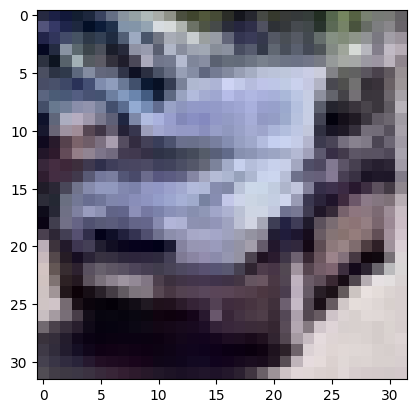

In [17]:
## Selecting image 290 from the test dataset and display it
image = test_data[290]
plt.imshow(image)

# Displaying the true label of image 290 which is an automobile
print(f"Image 100 is {test_labels[290]}")

# Predicting the label of image 290 using the trained model which is an automobile
pred_290 = np.argmax(model2.predict(image.reshape(1,32,32,3)))
print(f"The model predict that image 100 is {labels[pred_290]}")

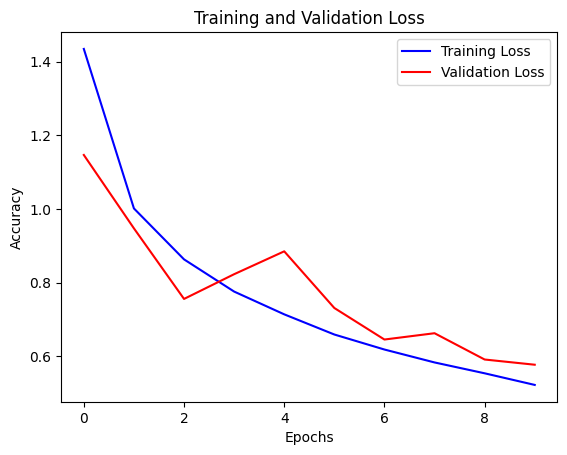

In [18]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.xlabel('Epochs')
# Adding labels and title
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


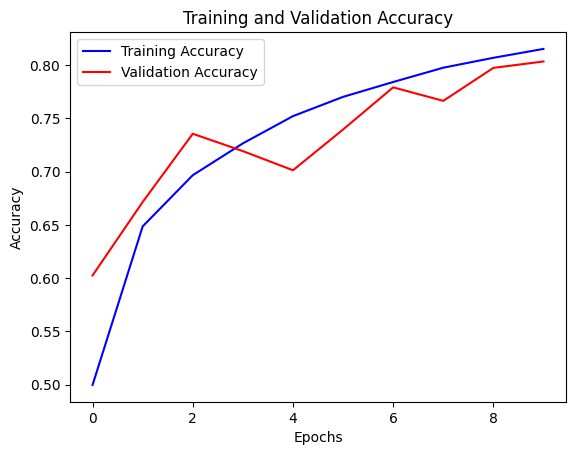

In [19]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()